<p style="background-color:#6F3096; color:#000000; text-align:center; padding:10px; margin:10px; border-radius:0px; font-size:24px;font-weight: bold; font-family: Arial;">Data Analysis and Prediction for Cardiovascular Diseases</p>

<p style="background-color:#6F3096; color:#000000; text-align:center; padding:10px; margin:10px; border-radius:0px; font-size:18px">1. Data Loading and Preprocessing</p>


Importing necessary libraries for data processing and visualization.

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

Setting up paths for data.

In [2]:
current_dir = os.getcwd()
data_dir = os.path.join(os.path.dirname(current_dir), 'data')

In [3]:
csv_file_path = os.path.join(data_dir, 'data.csv')

Reading dataset and checking for duplicates.

In [4]:
try:
    df=pd.read_csv(csv_file_path)
except FileNotFoundError:
    print('Error: File not found.')


In [5]:
df.drop_duplicates( inplace= True)
df.reset_index(inplace=True)
len(df)

308774

<p style="background-color:#6F3096; color:#000000; text-align:center; padding:10px; margin:10px; border-radius:0px; font-size:18px">2. Exploratory Data Analysis (EDA)</p>

A quick look at the data's basic information.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308774 entries, 0 to 308773
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   index                         308774 non-null  int64  
 1   General_Health                308774 non-null  object 
 2   Checkup                       308774 non-null  object 
 3   Exercise                      308774 non-null  object 
 4   Heart_Disease                 308774 non-null  object 
 5   Skin_Cancer                   308774 non-null  object 
 6   Other_Cancer                  308774 non-null  object 
 7   Depression                    308774 non-null  object 
 8   Diabetes                      308774 non-null  object 
 9   Arthritis                     308774 non-null  object 
 10  Sex                           308774 non-null  object 
 11  Age_Category                  308774 non-null  object 
 12  Height_(cm)                   308774 non-nul

<p style="background-color:#6F3096; color:#000000; text-align:center; padding:10px; margin:10px; border-radius:0px; font-size:18px">3. Data Transformation</p>

In [10]:
df.columns

Index(['index', 'General_Health', 'Checkup', 'Exercise', 'Heart_Disease',
       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis',
       'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [12]:
df['Diabetes'].value_counts()

Diabetes
No                                            259062
Yes                                            40170
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64

In [13]:
columns_list=[ str(column)for column in df.columns]

num_column_list=[]
cat_column_list=[]
for column in (columns_list):
    if df[column].dtype.name in ["int64","float64"]:
        num_column_list.append(column)
    else:
        cat_column_list.append(column)

print(num_column_list,cat_column_list)

['index', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'] ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']


In [14]:
cat_df=pd.get_dummies(df[cat_column_list],dtype=int,drop_first= False)
cat_df.reset_index(inplace=True)
cat_df

,index,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,...,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_No,Smoking_History_Yes
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308769,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
308770,308770,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
308771,308771,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
308772,308772,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Encoding categorical columns and scaling numerical ones.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_df=df[num_column_list]
num_df.drop(columns='index',inplace=True)
num_df_standardized = scaler.fit_transform(num_df)
num_df = pd.DataFrame(num_df_standardized, columns=num_df.columns)
# num_df.reset_index(inplace=True)
num_df

C:\Users\Home\AppData\Local\Temp\ipykernel_3592\2711812833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df.drop(columns='index',inplace=True)


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,-1.934170,-2.386099,-2.159627,-0.621621,0.006661,0.059656,0.664362
1,-0.526833,-0.303608,-0.051636,-0.621621,0.006661,-1.012235,-0.267624
2,-0.714478,0.227673,0.742501,-0.133842,-0.716876,-0.811255,1.130355
3,0.880503,0.461456,0.015819,-0.621621,0.006661,0.997561,0.198369
4,1.912549,0.227673,-0.652605,-0.621621,-0.877663,-0.744262,-0.733617
...,...,...,...,...,...,...,...
308769,-0.245366,-0.090908,0.064878,-0.133842,0.006661,-0.476289,-0.733617
308770,0.880503,-0.643740,-1.095666,0.353938,-0.596287,3.007357,-0.267624
308771,-1.277413,-1.047589,-0.603547,-0.133842,0.408626,-0.476289,-0.267624
308772,1.161970,-0.197258,-0.750723,-0.255786,0.006661,-0.208317,-0.733617


In [16]:
import pickle
with open(r'C:\Users\Home\Downloads\Cardio Vascular Prediction tool\scaler\scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [17]:
df_new=pd.concat([cat_df,num_df],axis=1,ignore_index=True)
df_new.columns = list(cat_df.columns) + list(num_df.columns)

In [18]:
df_new

,index,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,...,Age_Category_80+,Smoking_History_No,Smoking_History_Yes,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,-1.934170,-2.386099,-2.159627,-0.621621,0.006661,0.059656,0.664362
1,1,0,0,0,0,1,0,0,0,0,...,0,1,0,-0.526833,-0.303608,-0.051636,-0.621621,0.006661,-1.012235,-0.267624
2,2,0,0,0,0,1,0,0,0,0,...,0,1,0,-0.714478,0.227673,0.742501,-0.133842,-0.716876,-0.811255,1.130355
3,3,0,0,0,1,0,0,0,0,0,...,0,1,0,0.880503,0.461456,0.015819,-0.621621,0.006661,0.997561,0.198369
4,4,0,0,1,0,0,0,0,0,0,...,1,0,1,1.912549,0.227673,-0.652605,-0.621621,-0.877663,-0.744262,-0.733617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308769,0,0,0,0,1,0,0,0,0,...,0,1,0,-0.245366,-0.090908,0.064878,-0.133842,0.006661,-0.476289,-0.733617
308770,308770,0,1,0,0,0,0,0,0,1,...,0,1,0,0.880503,-0.643740,-1.095666,0.353938,-0.596287,3.007357,-0.267624
308771,308771,0,0,0,0,1,1,0,0,0,...,0,0,1,-1.277413,-1.047589,-0.603547,-0.133842,0.408626,-0.476289,-0.267624
308772,308772,0,0,0,0,1,0,0,0,0,...,0,1,0,1.161970,-0.197258,-0.750723,-0.255786,0.006661,-0.208317,-0.733617


In [19]:
df_new.drop(columns=['index'],inplace=True)
df_new

,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,...,Age_Category_80+,Smoking_History_No,Smoking_History_Yes,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,-1.934170,-2.386099,-2.159627,-0.621621,0.006661,0.059656,0.664362
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,-0.526833,-0.303608,-0.051636,-0.621621,0.006661,-1.012235,-0.267624
2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,-0.714478,0.227673,0.742501,-0.133842,-0.716876,-0.811255,1.130355
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0.880503,0.461456,0.015819,-0.621621,0.006661,0.997561,0.198369
4,0,0,1,0,0,0,0,0,0,1,...,1,0,1,1.912549,0.227673,-0.652605,-0.621621,-0.877663,-0.744262,-0.733617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,0,0,0,0,1,0,0,0,0,1,...,0,1,0,-0.245366,-0.090908,0.064878,-0.133842,0.006661,-0.476289,-0.733617
308770,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0.880503,-0.643740,-1.095666,0.353938,-0.596287,3.007357,-0.267624
308771,0,0,0,0,1,1,0,0,0,0,...,0,0,1,-1.277413,-1.047589,-0.603547,-0.133842,0.408626,-0.476289,-0.267624
308772,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1.161970,-0.197258,-0.750723,-0.255786,0.006661,-0.208317,-0.733617


<p style="background-color:#6F3096; color:#000000; text-align:center; padding:10px; margin:10px; border-radius:0px; font-size:18px">4. Feature Selection and Visualization</p>

In [39]:
scaler.fit_transform(df_new)

array([[-0.47031772, -0.36218942, -0.66842886, ...,  0.00666097,
         0.05965631,  0.6643617 ],
       [-0.47031772, -0.36218942, -0.66842886, ...,  0.00666097,
        -1.01223493, -0.26762397],
       [-0.47031772, -0.36218942, -0.66842886, ..., -0.71687648,
        -0.81125532,  1.13035453],
       ...,
       [-0.47031772, -0.36218942, -0.66842886, ...,  0.40862623,
        -0.47628931, -0.26762397],
       [-0.47031772, -0.36218942, -0.66842886, ...,  0.00666097,
        -0.2083165 , -0.73361681],
       [ 2.12622225, -0.36218942, -0.66842886, ..., -0.99825216,
        -0.2083165 , -0.6171186 ]])

In [20]:
df_new.T

,0,1,2,3,4,5,6,7,8,9,...,308764,308765,308766,308767,308768,308769,308770,308771,308772,308773
General_Health_Excellent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
General_Health_Fair,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
General_Health_Good,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
General_Health_Poor,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
General_Health_Very Good,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
Checkup_5 or more years ago,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Checkup_Never,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Checkup_Within the past 2 years,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Checkup_Within the past 5 years,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Checkup_Within the past year,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000


In [22]:
df_new.columns

Index(['General_Health_Excellent', 'General_Health_Fair',
       'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_5 or more years ago',
       'Checkup_Never', 'Checkup_Within the past 2 years',
       'Checkup_Within the past 5 years', 'Checkup_Within the past year',
       'Exercise_No', 'Exercise_Yes', 'Heart_Disease_No', 'Heart_Disease_Yes',
       'Skin_Cancer_No', 'Skin_Cancer_Yes', 'Other_Cancer_No',
       'Other_Cancer_Yes', 'Depression_No', 'Depression_Yes', 'Diabetes_No',
       'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes',
       'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_No',
       'Arthritis_Yes', 'Sex_Female', 'Sex_Male', 'Age_Category_18-24',
       'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39',
       'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54',
       'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69',
       'Age_Category_70-74'

<p style="background-color:#6F3096; color:#000000; text-align:center; padding:10px; margin:10px; border-radius:0px; font-size:18px">5. Model Preparation</p>

Visualizing correlations between features for potential relationships and multicollinearity.

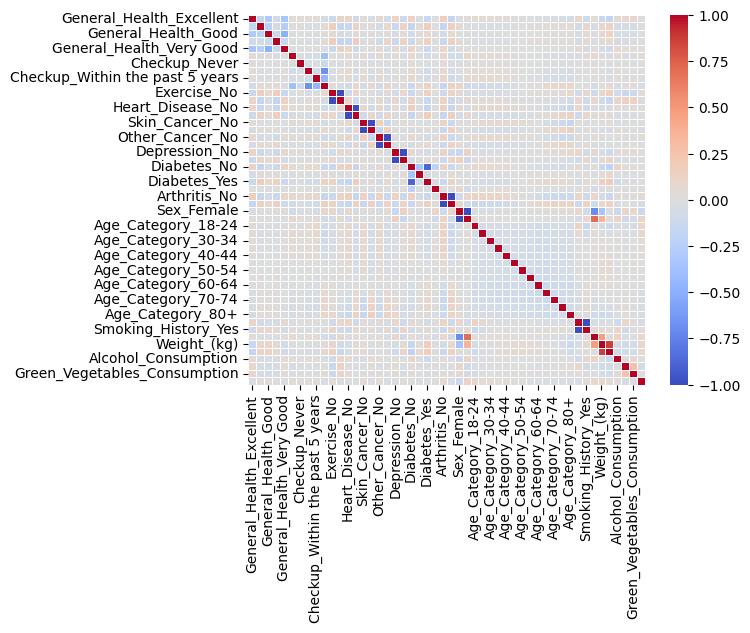

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_new.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()
plt.tight_layout()


<p style="background-color:#6F3096; color:#000000; text-align:center; padding:10px; margin:10px; border-radius:0px; font-size:18px">6. Model Training and Prediction</p>

Preparing data for model training by splitting it into training and testing sets.

In [26]:
X=df_new.drop(columns=['Heart_Disease_Yes','Heart_Disease_No'],axis=1)
y=df_new['Heart_Disease_Yes']

In [27]:
X

,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,...,Age_Category_80+,Smoking_History_No,Smoking_History_Yes,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,-1.934170,-2.386099,-2.159627,-0.621621,0.006661,0.059656,0.664362
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,-0.526833,-0.303608,-0.051636,-0.621621,0.006661,-1.012235,-0.267624
2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,-0.714478,0.227673,0.742501,-0.133842,-0.716876,-0.811255,1.130355
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0.880503,0.461456,0.015819,-0.621621,0.006661,0.997561,0.198369
4,0,0,1,0,0,0,0,0,0,1,...,1,0,1,1.912549,0.227673,-0.652605,-0.621621,-0.877663,-0.744262,-0.733617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,0,0,0,0,1,0,0,0,0,1,...,0,1,0,-0.245366,-0.090908,0.064878,-0.133842,0.006661,-0.476289,-0.733617
308770,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0.880503,-0.643740,-1.095666,0.353938,-0.596287,3.007357,-0.267624
308771,0,0,0,0,1,1,0,0,0,0,...,0,0,1,-1.277413,-1.047589,-0.603547,-0.133842,0.408626,-0.476289,-0.267624
308772,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1.161970,-0.197258,-0.750723,-0.255786,0.006661,-0.208317,-0.733617


In [28]:
X.columns

Index(['General_Health_Excellent', 'General_Health_Fair',
       'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_5 or more years ago',
       'Checkup_Never', 'Checkup_Within the past 2 years',
       'Checkup_Within the past 5 years', 'Checkup_Within the past year',
       'Exercise_No', 'Exercise_Yes', 'Skin_Cancer_No', 'Skin_Cancer_Yes',
       'Other_Cancer_No', 'Other_Cancer_Yes', 'Depression_No',
       'Depression_Yes', 'Diabetes_No',
       'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes',
       'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_No',
       'Arthritis_Yes', 'Sex_Female', 'Sex_Male', 'Age_Category_18-24',
       'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39',
       'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54',
       'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69',
       'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
df_new['Heart_Disease_Yes'].value_counts()

Heart_Disease_Yes
0    283803
1     24971
Name: count, dtype: int64

Using Random Forest with BayesSearchCV for optimizing hyperparameters.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9178


In [36]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


search_space = {
    "n_estimators": Integer(10, 300),
    "max_depth": Integer(1, 50),
    "min_samples_split": Real(0.001, 1),
    "min_samples_leaf": Real(0.001, 0.5),
    "bootstrap": Categorical([True, False]),
    "criterion": Categorical(["gini", "entropy"])
}


clf = RandomForestClassifier(random_state=42)


bayes_search = BayesSearchCV(
    clf,
    search_space,
    n_iter=50,
    scoring="accuracy",
    random_state=42,
    cv=3
)

bayes_search.fit(X_train, y_train)

print("Best Parameters:", bayes_search.best_params_)

Best Parameters: OrderedDict([('bootstrap', False), ('criterion', 'gini'), ('max_depth', 47), ('min_samples_leaf', 0.15858399715003732), ('min_samples_split', 0.6704778003206657), ('n_estimators', 130)])


In [38]:
models_dir = "models" 
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

pkl_filename = "best_model_rf_bayes.pkl"
pkl_path = os.path.join(models_dir, pkl_filename)

with open(pkl_path, 'wb') as file:
    pickle.dump(bayes_search.best_estimator_, file)

<p style="background-color:#6F3096; color:#000000; text-align:center; padding:10px; margin:10px; border-radius:0px; font-size:18px">7. Model Interpretability with SHAP</p>

Understanding model predictions can be as crucial as the predictions themselves. Here, we use SHAP to interpret the model's decisions.

In [40]:
import pickle
import shap

with open(r'C:\Users\Home\Downloads\Cardio Vascular Prediction tool\models\best_model_rf_bayes.pkl', "rb") as file:
    clf = pickle.load(file)

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


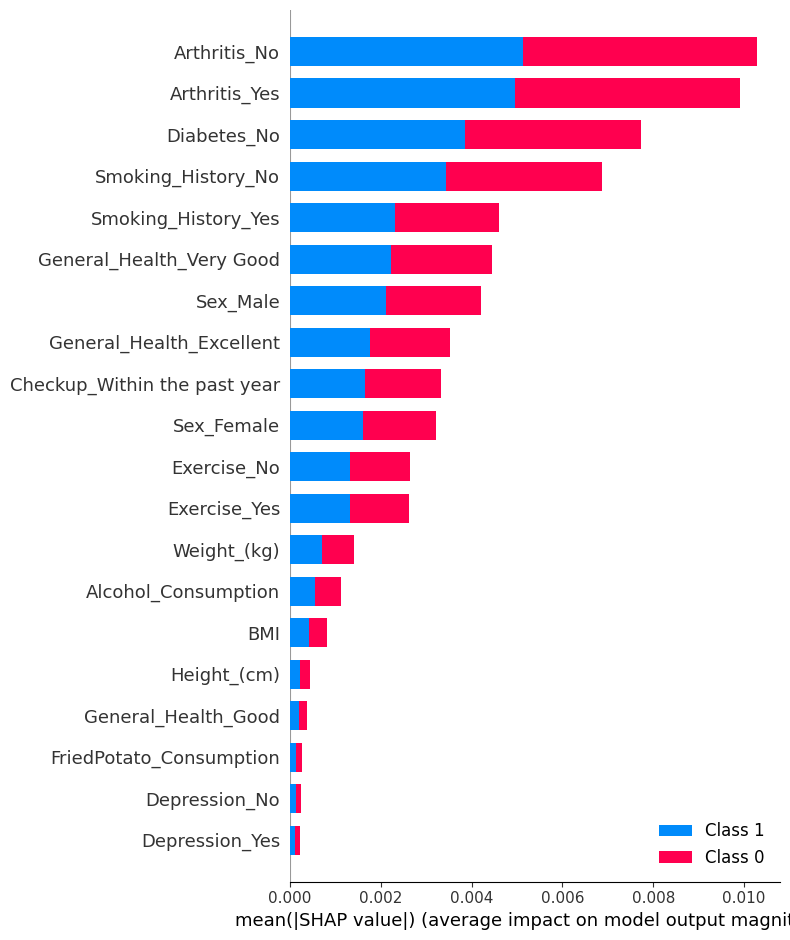

In [41]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

<Figure size 1000x600 with 0 Axes>

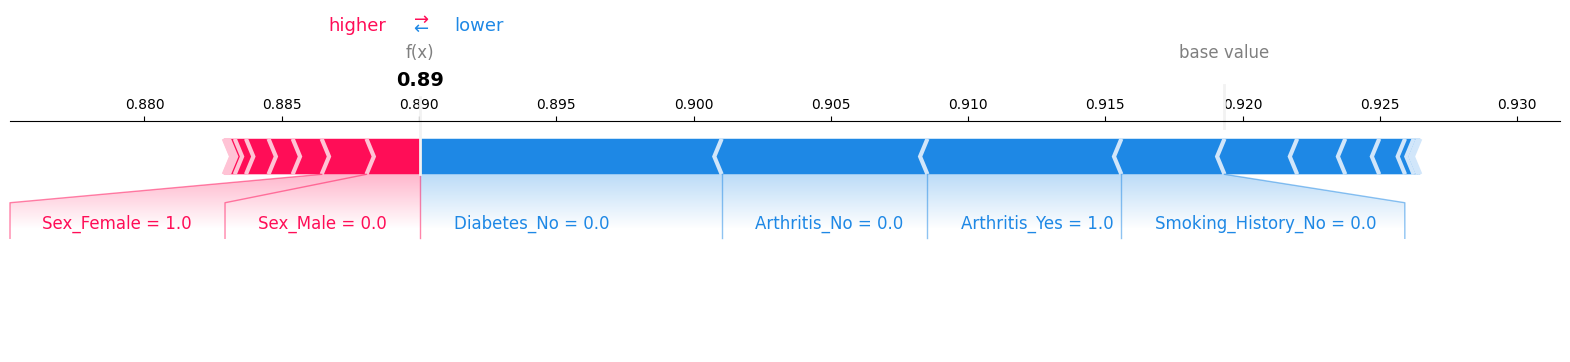

In [48]:
plt.figure(figsize=(10, 6))
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_train.iloc[0], matplotlib=True, show=True)
plt.tight_layout()


-----

<p style="background-color:#6F3096; color:#000000; text-align:center; padding:10px; margin:10px; border-radius:0px; font-size:18px">8. Deep Learning Approach (Optional)</p>

As an additional approach, we explore deep learning using Keras to see how it compares with traditional machine learning methods.

In [32]:
from keras.models import Sequential
from keras.layers import Dense

# Create the MLP model
model = Sequential() # create empty model and then add layers
model.add(Dense(128, input_dim=37, activation='relu',name ='Input')) # Dense layers with the ReLU (relu) activation function nonlinearity
model.add(Dense(64, activation='relu',name ='Hidden_Layer'))
model.add(Dense(1,activation='sigmoid',name ='Output')) # Prediction layer with sigmoid activation function

# Compile the model
model.compile( loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 128)               4864      
                                                                 
 Hidden_Layer (Dense)        (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 13185 (51.50 KB)
Trainable params: 13185 (51.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import os
import pickle

early_stop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

current_dir = os.getcwd()
models_dir = os.path.join(os.path.dirname(current_dir), 'models')

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

model_filename = "best_model.h5"
model_path = os.path.join(models_dir, model_filename)

model_checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

plot = model.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[early_stop, model_checkpoint])

pkl_filename = "best_model.pkl"
pkl_path = os.path.join(models_dir, pkl_filename)

with open(pkl_path, 'wb') as file:
    pickle.dump(model, file)

Epoch 1/100
6755/6755 [==============================] - 5s 669us/step - loss: 0.2291 - accuracy: 0.9193
Epoch 2/100
6755/6755 [==============================] - 4s 645us/step - loss: 0.2229 - accuracy: 0.9195
Epoch 3/100
6755/6755 [==============================] - 4s 650us/step - loss: 0.2220 - accuracy: 0.9194
Epoch 4/100
6755/6755 [==============================] - 4s 643us/step - loss: 0.2208 - accuracy: 0.9199
Epoch 5/100
6755/6755 [==============================] - 4s 647us/step - loss: 0.2203 - accuracy: 0.9197
Epoch 6/100
6755/6755 [==============================] - 4s 663us/step - loss: 0.2196 - accuracy: 0.9199
Epoch 7/100
6755/6755 [==============================] - 4s 663us/step - loss: 0.2191 - accuracy: 0.9199
Epoch 8/100
6755/6755 [==============================] - 5s 676us/step - loss: 0.2187 - accuracy: 0.9203
Epoch 9/100
6755/6755 [==============================] - 5s 705us/step - loss: 0.2179 - accuracy: 0.9202
Epoch 10/100
6755/6755 [==============================]

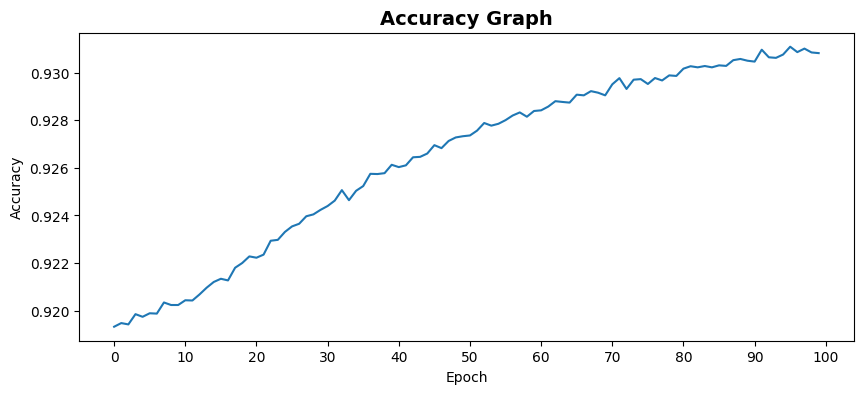

In [34]:
plt.figure(figsize = (10,4))
plt.title("Accuracy Graph", fontsize = 14, fontweight = "bold")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(range(0,210, 10))
plt.plot(plot.epoch, plot.history["accuracy"])
plt.show()
plt.tight_layout()


In [35]:
X.head(1)

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Skin_Cancer_Yes,...,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,-1.93417,-2.386099,-2.159627,-0.621621,0.006661,0.059656,0.664362
